# Animal Classification - An exploration of CNN models

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

100%|██████████| 586M/586M [00:26<00:00, 22.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2"
print("Dataset contents:", os.listdir(dataset_path))


Dataset contents: ['translate.py', 'raw-img']


In [ ]:
import os
import shutil

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

# Italian-to-English class name mapping
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel"
}

# Loop through Italian folders and rename them
for italian_name, english_name in translate.items():
    old_folder = os.path.join(dataset_path, italian_name)
    new_folder = os.path.join(dataset_path, english_name)

    if os.path.exists(old_folder) and not os.path.exists(new_folder):
        shutil.move(old_folder, new_folder)
        print(f"Renamed: {italian_name} → {english_name}")
    elif os.path.exists(new_folder):
        print(f"Already renamed: {english_name}")
    else:
        print(f"Folder not found: {italian_name}")

print("✅ Folder renaming completed successfully!")


Renamed: cane → dog
Renamed: cavallo → horse
Renamed: elefante → elephant
Renamed: farfalla → butterfly
Renamed: gallina → chicken
Renamed: gatto → cat
Renamed: mucca → cow
Renamed: pecora → sheep
Renamed: ragno → spider
Renamed: scoiattolo → squirrel
✅ Folder renaming completed successfully!


In [ ]:
class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
print("Updated class names:", class_names)


Updated class names: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [ ]:
import os

# Path to dataset
dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

# List current folder names
current_folders = sorted(os.listdir(dataset_path))

print("Current folders:", current_folders)

Current folders: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [ ]:
import tensorflow as tf
import numpy as np
import math

def optimize_dataset_loading(dataset_path, batch_size=32, validation_split=0.2):
    """
    Optimized dataset loading with separate training and validation datasets
    """
    # Create separate training and validation datasets
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_path,
        image_size=(64, 64),
        batch_size=batch_size,
        validation_split=validation_split,
        subset="training",
        shuffle=True,
        seed=42
    )

    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_path,
        image_size=(64, 64),
        batch_size=batch_size,
        validation_split=validation_split,
        subset="validation",
        shuffle=True,
        seed=42
    )

    # Performance optimization
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
    test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

    # Detailed dataset information
    def print_dataset_details(dataset, name):
        dataset_list = list(dataset)
        print(f"{name} Dataset:")
        print(f"Number of batches: {len(dataset_list)}")
        if dataset_list:
            print(f"Batch image shape: {dataset_list[0][0].shape}")
            print(f"Batch labels shape: {dataset_list[0][1].shape}")
        print(f"Total {name.lower()} images: {len(dataset_list) * batch_size}")

    print_dataset_details(train_dataset, "Training")
    print_dataset_details(test_dataset, "Test")

    return train_dataset, test_dataset

# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

# Load and optimize dataset
train_dataset, test_dataset = optimize_dataset_loading(dataset_path)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Training Dataset:
Number of batches: 655
Batch image shape: (32, 64, 64, 3)
Batch labels shape: (32,)
Total training images: 20960
Test Dataset:
Number of batches: 164
Batch image shape: (32, 64, 64, 3)
Batch labels shape: (32,)
Total test images: 5248


In [ ]:
ls /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img

butterfly/  cat/  chicken/  cow/  dog/  elephant/  horse/  sheep/  spider/  squirrel/


In [ ]:
ls -R /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img

Streaming output truncated to the last 5000 lines.
OIP-68sIln1fjWYQyrypjKQiHwHaLK.jpeg
OIP-69-AmpB6nFFT-ikxW2E29gHaGD.jpeg
OIP-6A6-LMGkdbIeSce9ikgkFwHaGg.jpeg
OIP-6awwwOpzVOks_yECwkndCQHaFW.jpeg
OIP-6BFBg7tJ0EDAcqo2vBF40wHaFY.jpeg
OIP-6_BUcsNskIRmm6Ow_yBGWgHaE7.jpeg
OIP-6d0iURBaGWF-899OyjujGgHaFK.jpeg
OIP-6DgJNLSijdwFo9kUjrkGiAHaKb.jpeg
OIP-6DjAFJVZpw6iOcnJ-303IwHaJ4.jpeg
OIP-6dVuXXcO5FX8EpstV6mKegHaFS.jpeg
OIP-6e_AbJ6BJ39g98ofnNYxOgHaFh.jpeg
OIP-6ENXh_nkZir-jQxUZl-85wHaKD.jpeg
OIP-6eonsldXx_Igq9ypenM6gQHaFi.jpeg
OIP-6EsdIQLipz6W5nGAEmhB6wEsEH.jpeg
OIP-6FiqYvdIYUPqmx6Z-sx1JwAAAA.jpeg
OIP-6hCG92yWqXLshg-I-tbTxgHaEI.jpeg
OIP-6Hcv-5cxA17RCW_PH6ln2AHaK9.jpeg
OIP-6HD_pA1vevX9YzwNVpU8mgHaFH.jpeg
OIP-6h-ElApt058UmMFNNmqpjwHaFb.jpeg
OIP-6HIokFseYB7L7Q7ozPvyNwHaFj.jpeg
OIP-6IMyNWwzZ_DOaNzN4-VlLAHaE7.jpeg
OIP-6IY6xik9TOyzC1_B3Dww-gHaE8.jpeg
OIP-6kCJ6_pLKQgoG_UOspK0ogHaFZ.jpeg
OIP-6kgeEH6_vo4ryyU0mJYhTAHaEt.jpeg
OIP-6koJdnsK5ZFd2q9FLjK2-gHaFU.jpeg
OIP--6ksON9br7_m-s1TrD-gswHaE8.jpeg
OIP-6Ky_6WA1q

In [ ]:
import os

dataset_dir = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

valid_extensions = ['.jpg', '.jpeg', '.png']
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if any(f.endswith(ext) for ext in valid_extensions)]
        print(f"{class_name}: {len(images)} valid images")



cat: 1668 valid images
spider: 4821 valid images
squirrel: 1862 valid images
butterfly: 2112 valid images
sheep: 1820 valid images
elephant: 1446 valid images
chicken: 3098 valid images
horse: 2623 valid images
cow: 1866 valid images
dog: 4863 valid images


This is for extracting the x train and y train

In [ ]:
import numpy as np
import tensorflow as tf

# Load dataset with labels
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img",
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img",
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

def save_dataset(dataset, file_prefix):
    X_list, y_list = [], []
    for images, labels in dataset:
        X_list.append(images.numpy())
        y_list.append(labels.numpy())

    X_array = np.concatenate(X_list, axis=0)
    y_array = np.concatenate(y_list, axis=0)

    np.save(f"{file_prefix}_X.npy", X_array)
    np.save(f"{file_prefix}_y.npy", y_array)

# Save training and test sets
save_dataset(train_dataset, "train")
save_dataset(test_dataset, "test")

# Load later without reprocessing
X_train = np.load("train_X.npy")
y_train = np.load("train_y.npy")
X_test = np.load("test_X.npy")
y_test = np.load("test_y.npy")

print(X_train.shape, y_train.shape)  # Example: (num_samples, 128, 128, 3), (num_samples,)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
(20944, 64, 64, 3) (20944,)


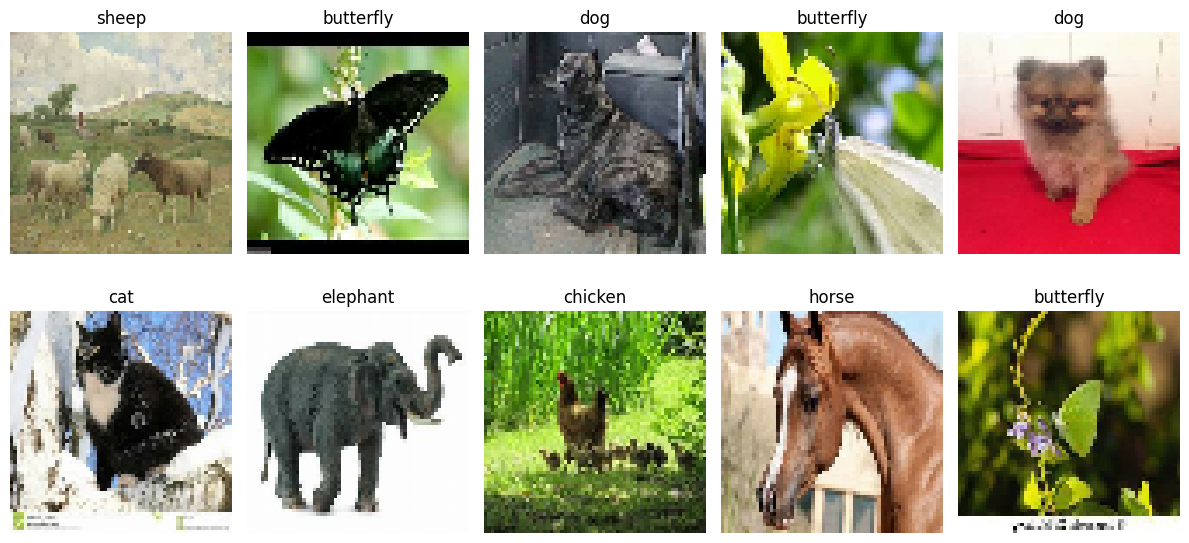

In [ ]:
# Visualization

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical

# Define class names based on dataset
class_names = train_dataset.class_names  # Extract class names from dataset

# Select 10 random images
num_images = 10
indices = random.sample(range(X_train.shape[0]), num_images)  # Get 10 random indices

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, idx in enumerate(indices):
    axes[i].imshow(X_train[idx].astype("uint8"))  # Convert to uint8 for visualization
    axes[i].set_title(class_names[y_train[idx]])  # Display class name
    axes[i].axis("off")  # Hide axes

plt.tight_layout()
plt.show()

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 4
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fully Connected Layers
    layers.GlobalAveragePooling2D(), #removed flatten
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 490,314 (1.87 MB)

 Trainable params: 489,354 (1.87 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history_1 = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9968 - loss: 0.0164 - val_accuracy: 0.7440 - val_loss: 1.9955
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9967 - loss: 0.0172 - val_accuracy: 0.7142 - val_loss: 2.3416
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9966 - loss: 0.0174 - val_accuracy: 0.7244 - val_loss: 2.1330
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9970 - loss: 0.0158 - val_accuracy: 0.7423 - val_loss: 2.0483
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9945 - loss: 0.0295 - val_accuracy: 0.6856 - val_loss: 2.0742
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9936 - loss: 0.0269 - val_accuracy: 0.6862 - val_loss: 2.3630
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9948 - loss: 0.0222 - val_accuracy: 0.6944 - val_loss: 2.3558
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9967 - loss: 0.0180 - val_accuracy: 0.7394 - v

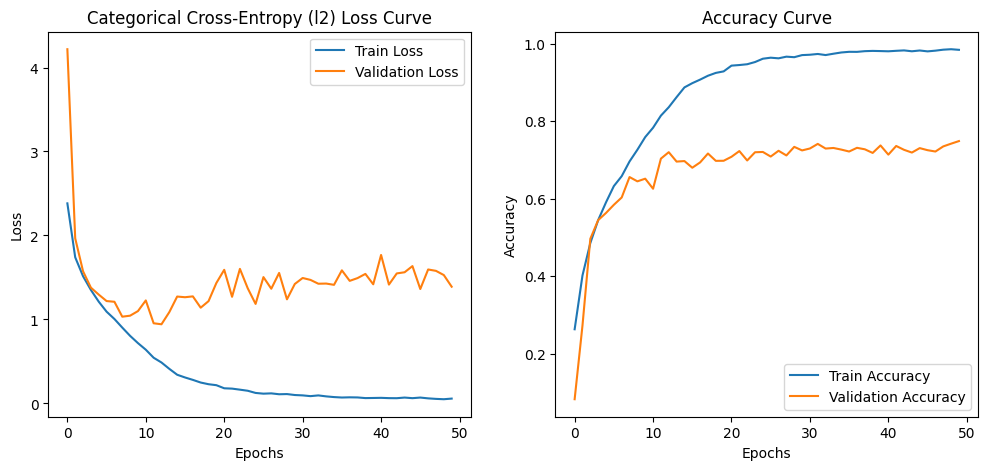

In [ ]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Categorical Cross-Entropy (l2) Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━

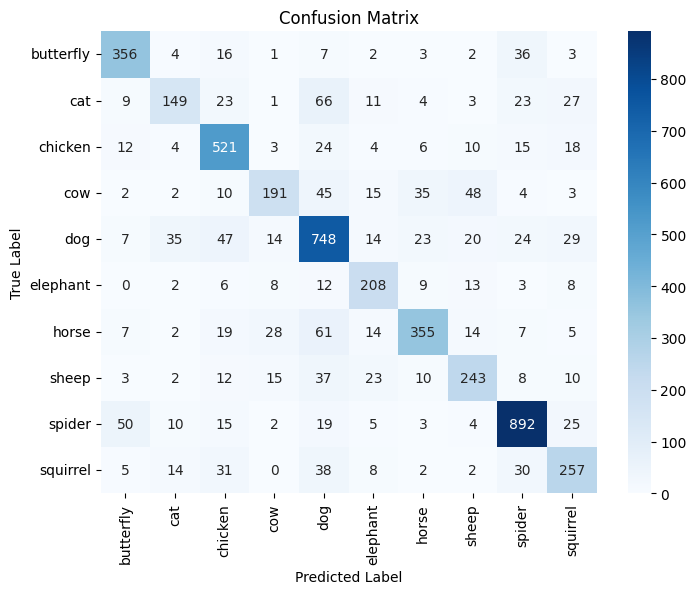

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)  # Get predictions
    y_true.extend(labels.numpy())  # Store true labels
    y_pred.extend(np.argmax(preds, axis=1))  # Convert probabilities to class indices

# Compute Classification Report (Includes Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_dataset.class_names))

# Compute F1-Score (Macro and Weighted)
macro_f1 = f1_score(y_true, y_pred, average="macro")  # Average across all classes equally
weighted_f1 = f1_score(y_true, y_pred, average="weighted")  # Weighted by class frequency

print(f"\nMacro F1-Score: {macro_f1:.4f}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = test_dataset.class_names  # Get class names from dataset

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
